In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df=pd.read_csv('data/stud.csv')

In [115]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [116]:
df.shape

(1000, 8)

### Checking for null values


In [117]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### Checking for duplicate entries

In [118]:
df.duplicated().sum()

0

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [120]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### Statistical values of all numerical columns

In [121]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Numerical and categorical features

In [122]:
numerical_features=[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']

print(f'Numerical features: {numerical_features}')
print(f'Categorical features: {categorical_features}')

Numerical features: ['math_score', 'reading_score', 'writing_score']
Categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding New Features 'total_scores' and 'average_scores'

In [ ]:
df['total_scores']=df['math_score']+df['reading_score']+df['writing_score']
df['average_scores']=df['total_scores']/3

In [124]:
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_scores,average_scores
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


### Plotting gender count

<Axes: xlabel='gender'>

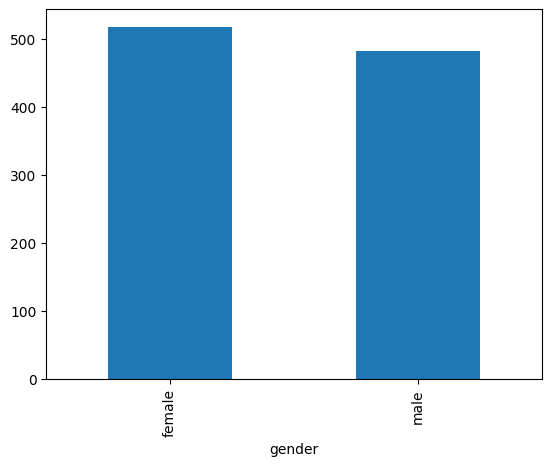

In [125]:
df['gender'].value_counts().plot(kind='bar')

### Females tends To perform well  

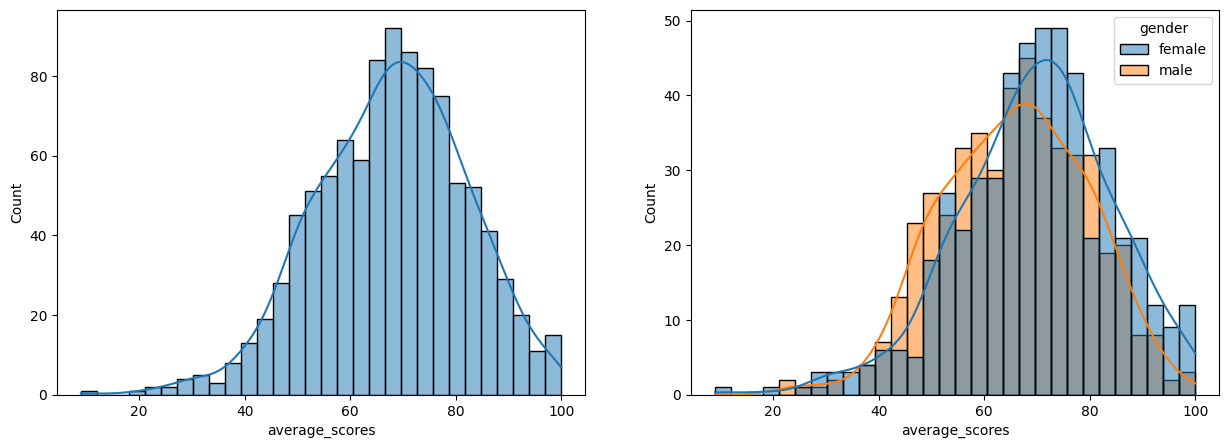

In [126]:
ax,fig=plt.subplots(1,2,figsize=(15,5))
plt.subplot(121)
sns.histplot(data=df,x='average_scores',bins=30,kde=True)
plt.subplot(122)
sns.histplot(data=df,x='average_scores',bins=30,hue='gender',kde=True)
plt.show()

### First plot students having standard lunch are performing well
### Second plot students those who have completed test_prep_course are having high scores
### Third plot kind of messy lets look it in the next plots

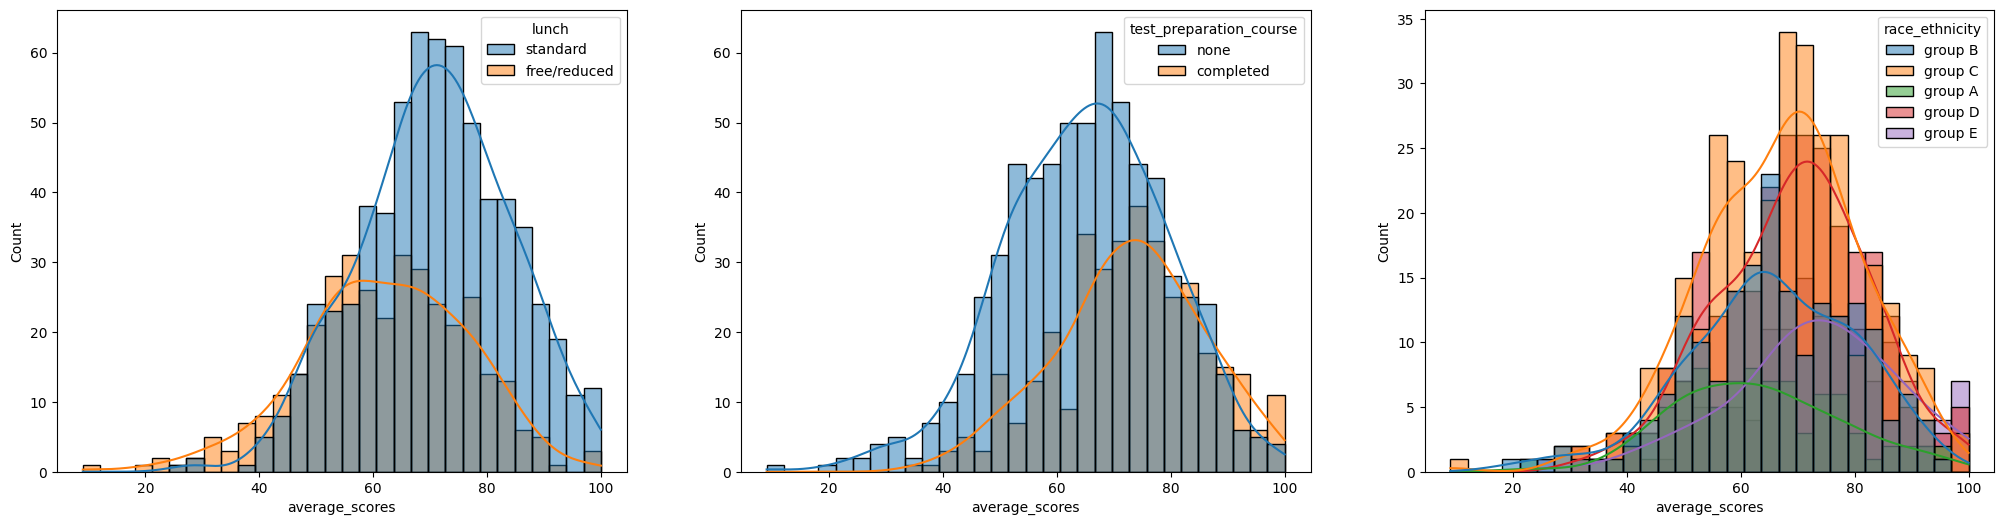

In [127]:
ax,fig=plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average_scores',bins=30,hue='lunch',kde=True)
plt.subplot(132)
sns.histplot(data=df,x='average_scores',bins=30,hue='test_preparation_course',kde=True)
plt.subplot(133)
sns.histplot(data=df,x='average_scores',bins=30,hue='race_ethnicity',kde=True)
plt.show()

### Low Performing Group 
#### Students parents who have completed bachelor degree and masters dont have low scores
#### In second plot group b and group c ethnicity stduents are performing not so well 


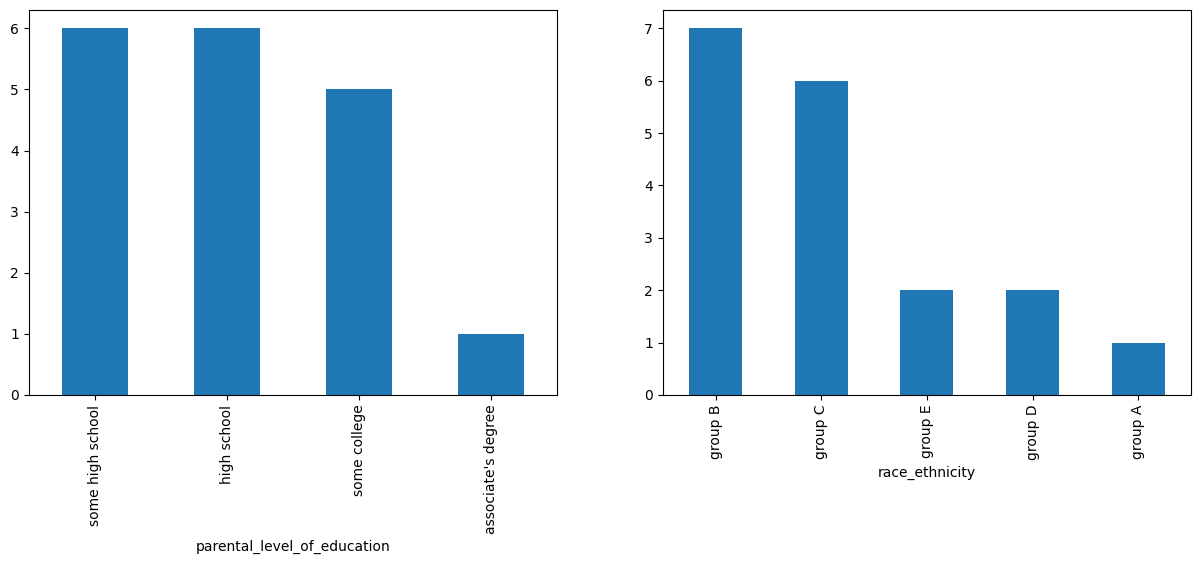

In [128]:
lpg_df=df[df['average_scores']<35]
ax,fig=plt.subplots(1,2,figsize=(15,5))
plt.subplot(121)
lpg_df['parental_level_of_education'].value_counts().plot(kind='bar')
plt.subplot(122)
lpg_df['race_ethnicity'].value_counts().plot(kind='bar')
plt.show()

### High performing group
#### Looks like parental eductaion doesnt have any coorelation with students performance
#### Looks like group a and group b students are not performing well

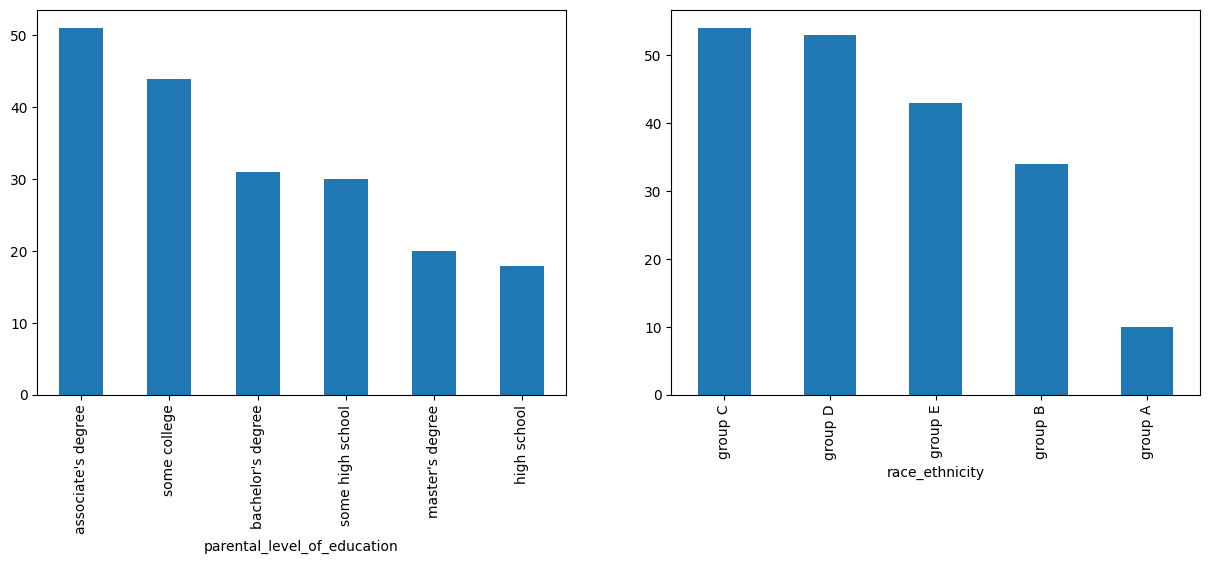

In [129]:
ax,fig=plt.subplots(1,2,figsize=(15,5))
plt.subplot(121)
hpg_df=df[df['average_scores']>80]
hpg_df['parental_level_of_education'].value_counts().plot(kind='bar')
plt.subplot(122)
hpg_df['race_ethnicity'].value_counts().plot(kind='bar')
plt.show()

### Counts of students who have taken preparation course

<Axes: xlabel='test_preparation_course'>

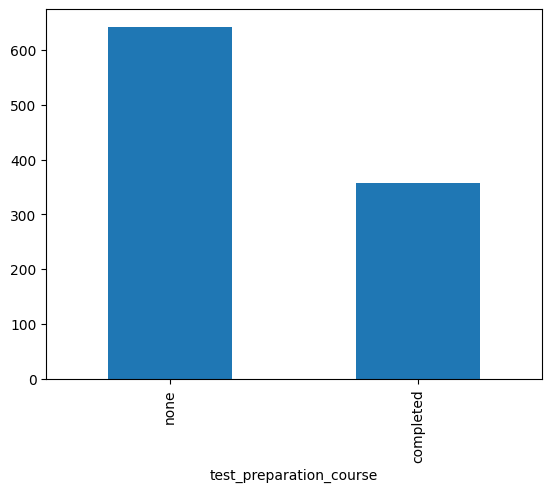

In [130]:

df['test_preparation_course'].value_counts().plot(kind='bar')

### Looks like students who have completed test prep course are performing well

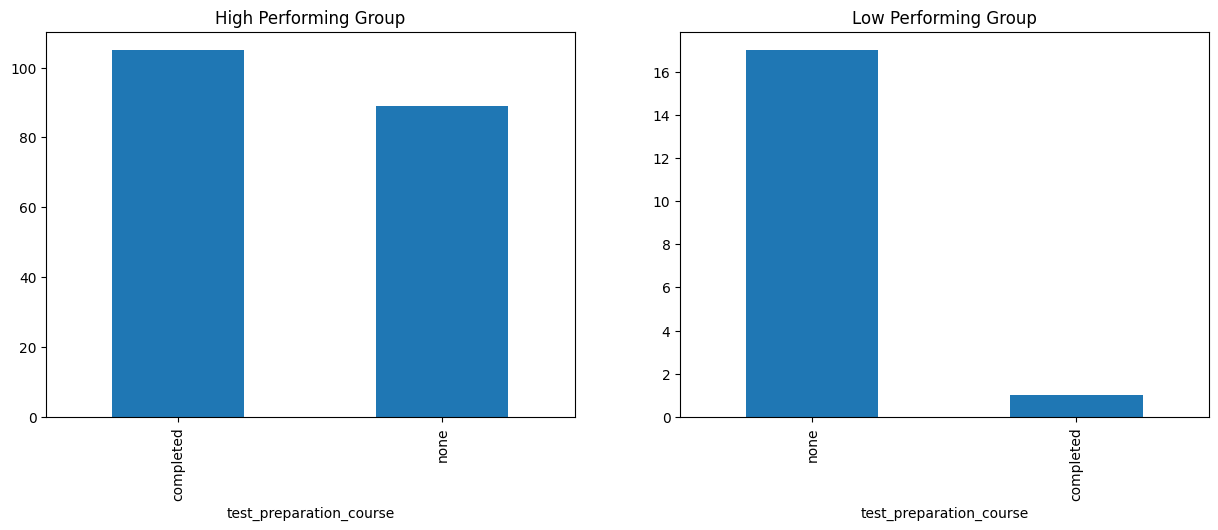

In [131]:
ax,fig=plt.subplots(1,2,figsize=(15,5))
plt.subplot(121)
hpg_df['test_preparation_course'].value_counts().plot(kind='bar',title='High Performing Group')
plt.subplot(122)
lpg_df['test_preparation_course'].value_counts().plot(kind='bar',title='Low Performing Group')
plt.show()

### Numerical columns are bit left skewed 

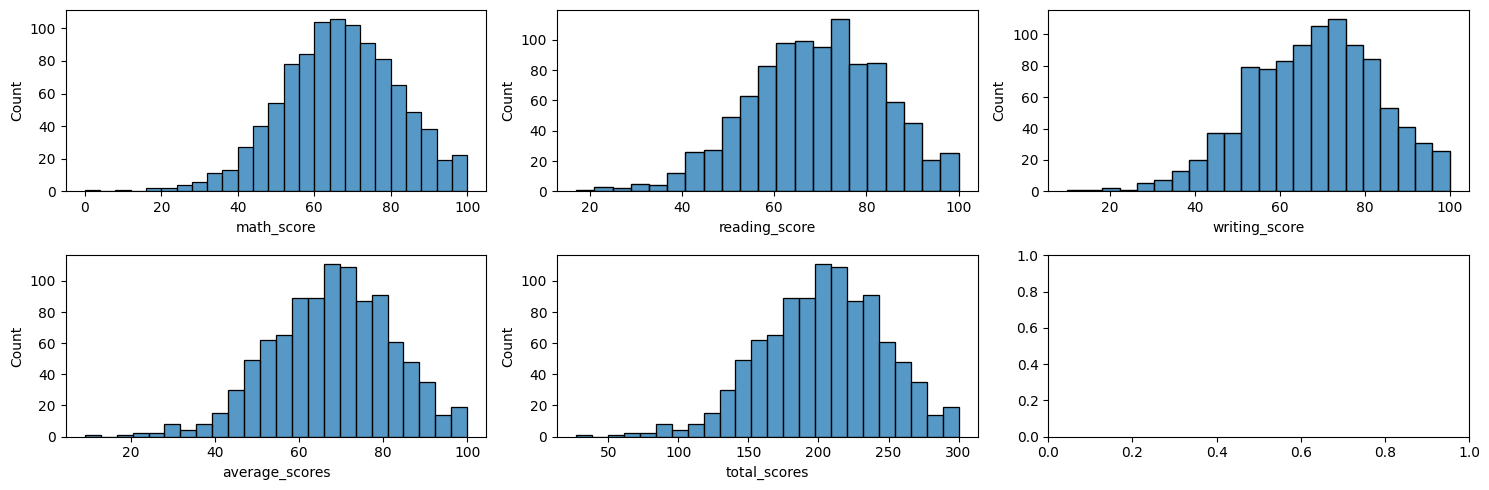

In [132]:
ax,fig=plt.subplots(2,3,figsize=(15,5)) 
plt.subplot(231)
sns.histplot(data=df,x='math_score')
plt.subplot(232)
sns.histplot(data=df,x='reading_score') 
plt.subplot(233)
sns.histplot(data=df,x='writing_score')
plt.subplot(234)
sns.histplot(data=df,x='average_scores')
plt.subplot(235)
sns.histplot(data=df,x='total_scores')
plt.tight_layout()
plt.show()

### Checking for outliers

<Axes: xlabel='total_scores'>

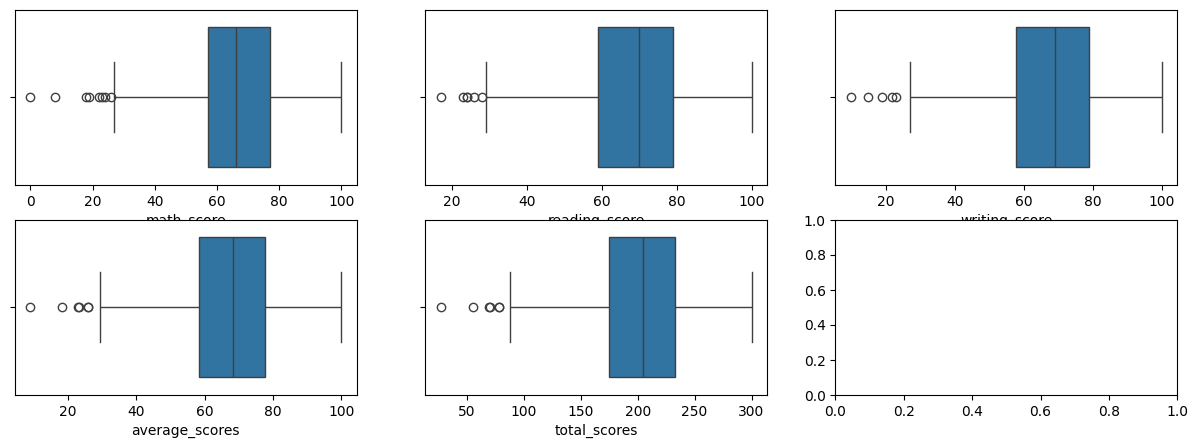

In [133]:
ax,fig=plt.subplots(2,3,figsize=(15,5))
plt.subplot(231)
sns.boxplot(data=df,x='math_score')
plt.subplot(232)
sns.boxplot(data=df,x='reading_score')
plt.subplot(233)
sns.boxplot(data=df,x='writing_score')
plt.subplot(234)
sns.boxplot(data=df,x='average_scores')
plt.subplot(235)
sns.boxplot(data=df,x='total_scores')